In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
from matplotlib.colors import ListedColormap

In [2]:
DATASET_DIR = r"../data/"
DATASET_NAME = "theta_posix_with_apps_no_negative_outliers_no_time_witherrors_withresults.csv"
DATASET_PATH = Path(DATASET_DIR, DATASET_NAME).with_suffix(".csv")

In [3]:
df_theta_posix = pd.read_csv(DATASET_PATH)

In [4]:
df_blue_waters_posix = pd.read_csv(Path(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time_witherrors.csv"))

In [5]:
len(df_theta_posix)

218111

In [6]:
len(df_blue_waters_posix)

820701

**inputs for nwchem are mostly 0!**

In [7]:
df_theta_posix[df_theta_posix.exe == "nwchem"].loc[:, (df_theta_posix[df_theta_posix.exe == "nwchem"] == 0).all()]

,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,...,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS
3330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
most_used_apps = df_theta_posix.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)

In [9]:
len(most_used_apps)

342

In [10]:
most_used_apps["cp2k.psmp"]

8626

In [11]:
most_used_apps_blue_waters = df_blue_waters_posix.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)

In [12]:
len(most_used_apps_blue_waters)

906

## Plot the ok predictions (i.e. correct order of magnitude)

In [13]:
ok_predictions = df_theta_posix[np.abs(np.log(df_theta_posix.POSIX_TOTAL_TIME) -
                np.log(df_theta_posix.POSIX_TOTAL_TIME_predicted))
               < 2]
ok_predictions_counts = ok_predictions.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)
#If you want percentages
#(ok_predictions_counts / most_used_apps[most_used_apps.index.isin(ok_predictions_counts.index)]) * 100
ok_predictions_counts

C:\Users\arcturus5340\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exe
pw.x                                                                  40865
gmx_mpi                                                               11828
train.x-2.0.3-ifort_intelmpi                                           1204
brush.dna.geo.mpi                                                      1199
qb                                                                      814
                                                                      ...  
mbtempest                                                                 1
mpi-io-test                                                               1
osiris-2D.knl                                                             1
nwchem-tmp                                                                1
8_8_8_10_logvl66f58_flash_io6663b_hdf4aa40_pnc70db7_thet_1_16_hdf5        1
Name: nprocs, Length: 116, dtype: int64

In [14]:
def plot_ok_predictions(app_name):
    filterspec = (df_theta_posix.exe.str.contains(app_name))#
    filterspec_goodpred = (df_theta_posix.index.isin(ok_predictions.index) == True)
    ax = df_theta_posix[filterspec].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME",label="expected output",c="navy")
    df_theta_posix[filterspec & (filterspec_goodpred == False)].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME_predicted",ax=ax, c="orange",label="predictions")#, c=kernel,cmap="viridis", colorbar=True)
    df_theta_posix[filterspec & (filterspec_goodpred == True)].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME_predicted",ax=ax, c="limegreen",label="correct order of magnitude")
    ax.set_yscale("log")
    ax.set_xscale("log")

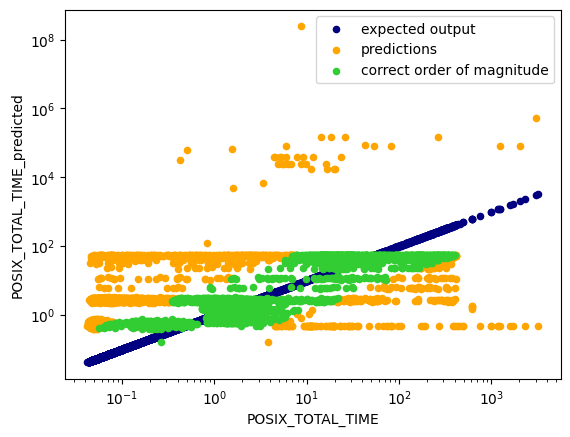

In [15]:
plot_ok_predictions("pw.x")

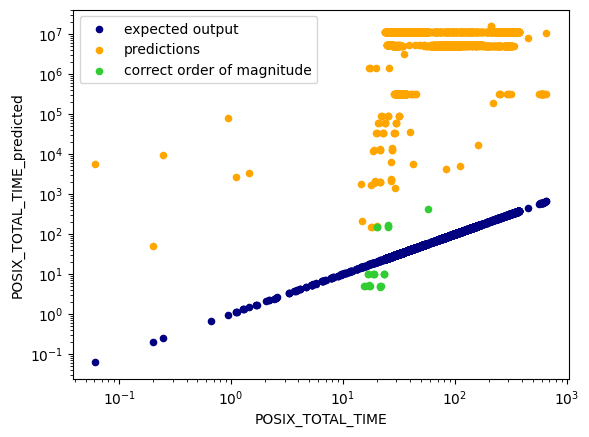

In [16]:
plot_ok_predictions("cp2k.psmp")

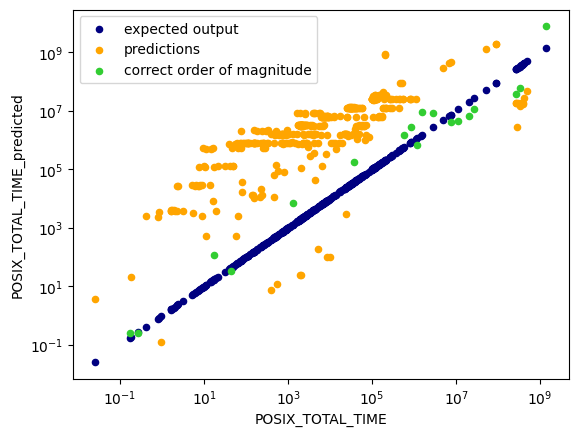

In [17]:
plot_ok_predictions("rxmd")

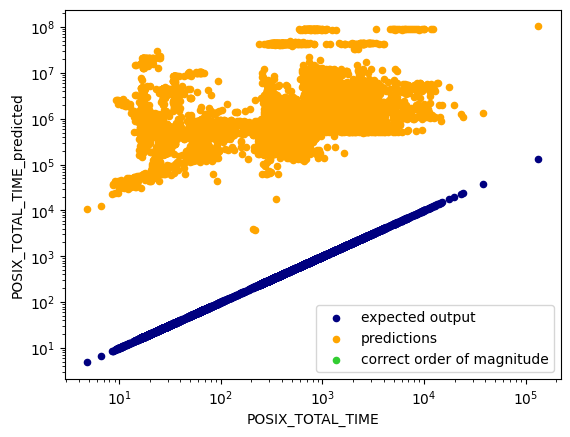

In [18]:
plot_ok_predictions("vasp_std")

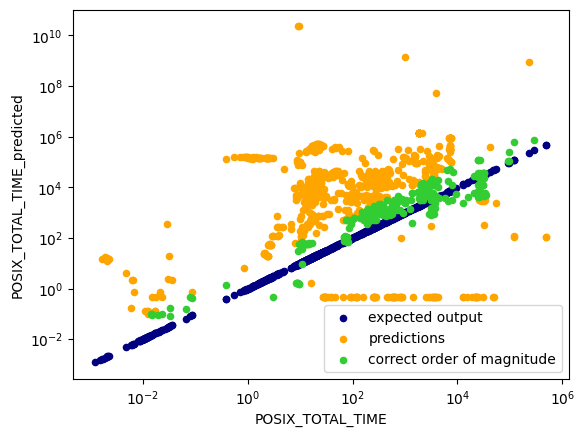

In [19]:
plot_ok_predictions("nek5000")

## Comparison of app occurences between Theta and Blue Waters

In [20]:
app_counts = pd.DataFrame(most_used_apps.rename("count")).join(pd.DataFrame(most_used_apps_blue_waters.rename("count")),how='outer',lsuffix='_theta',rsuffix='_blue_waters')
app_counts["ok_predictions"] = ok_predictions_counts
app_counts[app_counts.index.str.contains("cp2k")]

,count_theta,count_blue_waters,ok_predictions
exe,,,
cp2k.psmp,8626.0,NaN,22.0
cp2k_2.5.1.popt,NaN,148.0,NaN


## Create overview of prediction quality per app

In [21]:
abs_errors = (df_theta_posix.POSIX_TOTAL_TIME - df_theta_posix.POSIX_TOTAL_TIME_predicted).abs()
abs_errors_percent = abs_errors / df_theta_posix["mean"]
df_app_overview = pd.DataFrame()
df_app_overview["error_percent"] = abs_errors_percent
#df_app_overview["dup_mean"] = df_theta_posix["mean"]
df_app_overview["exe"] = df_theta_posix.exe
df_app_overview["POSIX_TOTAL_TIME"] = df_theta_posix.POSIX_TOTAL_TIME
df_app_overview["POSIX_TOTAL_TIME_predicted"] = df_theta_posix.POSIX_TOTAL_TIME_predicted
df_app_overview_agg = df_app_overview.groupby("exe").agg({
    "exe":"count",
    "error_percent":["median","count"],
    "POSIX_TOTAL_TIME":["mean","var"],
    "POSIX_TOTAL_TIME_predicted":["mean","var"]
}).sort_values(by=[("exe","count"),("error_percent","median")],ascending=False)
df_app_overview_agg[df_app_overview_agg.index.str.contains("")]

exe error_percent        POSIX_TOTAL_TIME  \
                                count        median  count             mean   
exe                                                                           
nwchem                          78209    545.998923  75021         0.006045   
pw.x                            46972      0.596684  46640         4.004956   
gmx_mpi                         12812      0.441554  12783         1.770848   
vasp_std                         9186           NaN      0       653.653275   
cp2k.psmp                        8626  10467.500926   1221        60.489736   
...                               ...           ...    ...              ...   
pjoinwrfout                         1           NaN      0         2.319298   
train.x-2.0.3-gfortran_mkl_mpi      1           NaN      0         0.227379   
wc110_8                             1           NaN      0        52.979760   
wfreq.x                             1           NaN      0         0.094000   
xmfdn-h2-lobpcg                     1           NaN      0         3.876629   

                                             POSIX_TOTAL_TIME_predicted  \
                                         var                       mean   
exe                                                                       
nwchem                          8.812174e-03               3.798370e+00   
pw.x                            1.463861e+03               5.202809e+03   
gmx_mpi                         2.668767e+03               1.607301e+00   
vasp_std                        3.709776e+06               3.446633e+06   
cp2k.psmp                       4.540923e+03               8.446489e+06   
...                                      ...                        ...   
pjoinwrfout                              NaN               1.313381e+07   
train.x-2.0.3-gfortran_mkl_mpi           NaN              -2.891499e+01   
wc110_8                                  NaN               2.007638e+03   
wfreq.x                                  NaN               1.301060e+05   
xmfdn-h2-lobpcg                          NaN               4.796352e-01   

                                              
                                         var  
exe                                           
nwchem                          3.653868e+05  
pw.x                            1.245403e+12  
gmx_mpi                         1.620287e+02  
vasp_std                        1.226828e+14  
cp2k.psmp                       1.651005e+13  
...                                      ...  
pjoinwrfout                              NaN  
train.x-2.0.3-gfortran_mkl_mpi           NaN  
wc110_8                                  NaN  
wfreq.x                                  NaN  
xmfdn-h2-lobpcg                          NaN  

[342 rows x 7 columns]

In [22]:
abs_errors = (df_theta_posix.POSIX_TOTAL_TIME - df_theta_posix.POSIX_TOTAL_TIME_predicted).abs()
abs_errors_percent = abs_errors / df_theta_posix["mean"]
df_mae_by_app = pd.DataFrame()
df_mae_by_app["error_percent"] = abs_errors_percent
df_mae_by_app["dup_mean"] = df_theta_posix["mean"]
df_mae_by_app["exe"] = df_theta_posix.exe
df_mae_by_app["POSIX_TOTAL_TIME"] = df_theta_posix.POSIX_TOTAL_TIME
df_mae_by_app["POSIX_TOTAL_TIME_predicted"] = df_theta_posix.POSIX_TOTAL_TIME_predicted
df_mae_by_app_agg = df_mae_by_app.groupby(["exe","dup_mean"]).agg({
    "exe":"count",
    "error_percent":["median","count"],
    "POSIX_TOTAL_TIME":["mean","var"],
    "POSIX_TOTAL_TIME_predicted":["mean","var"]
}).sort_index(level=["dup_mean"],ascending=False)

In [23]:
df_mae_by_app_agg.to_csv("theta_mae_mean_by_app_by_dup_mean.csv")

### IQR Criterion for Behaviour Similarity

In [24]:
pwx_df = df_theta_posix.loc[:,["exe","mean","POSIX_TOTAL_TIME"]]
iqr_counts = pwx_df.groupby(["exe","mean"]).agg(lambda x: x[x > x.quantile(0.75) + (1.5 * x.quantile(0.75) - x.quantile(0.25))].count())

In [25]:
iqr_counts.groupby(["exe"]).sum().sort_values(by=["POSIX_TOTAL_TIME"],ascending=False)

,POSIX_TOTAL_TIME
exe,
nwchem,4562
pw.x,1898
gmx_mpi,203
xmfdn-menj-lan,55
bs-solctra-multinode,14
...,...
c12cx.gr.x_41,0
c12cx.gr.x_42,0
c12cx.gr.x_43,0


## Cross-Correlation Criterion

In [26]:
quantile_distances = df_theta_posix.loc[:,["exe","mean","POSIX_TOTAL_TIME","POSIX_TOTAL_TIME_predicted"]].groupby(["exe","mean"]).agg({
    "mean":"count",
    "POSIX_TOTAL_TIME":lambda x: x.quantile(0.75) - x.median(),
    "POSIX_TOTAL_TIME_predicted":lambda x: x.median() - x.quantile(0.25)
})

In [27]:
pwx_dists = quantile_distances[quantile_distances.index.get_level_values("exe").str.contains("pw.x")]
pwx_dists[pwx_dists["mean"] > 100].corr()

,mean,POSIX_TOTAL_TIME,POSIX_TOTAL_TIME_predicted
mean,1.000000,-0.122367,-0.317653
POSIX_TOTAL_TIME,-0.122367,1.000000,0.384157
POSIX_TOTAL_TIME_predicted,-0.317653,0.384157,1.000000


## Investigate the reasons for outliers

In [28]:
df_theta_posix[df_theta_posix["mean"] == 22.203737326696807].sort_values("error")

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
5167,5167,5167,194,172,0,34,1499,6,54,0,...,0,0,-1,0.045962,16,1,pw.x,22.203737,-22.157776,0.605629
14049,14049,14049,194,172,0,34,1499,6,54,0,...,0,0,-1,0.046316,16,1,pw.x,22.203737,-22.157422,0.587987
5875,5875,5875,194,172,0,34,1499,6,54,0,...,0,0,0,0.048052,16,1,pw.x,22.203737,-22.155685,2.527838
913,913,913,194,172,0,34,1499,6,54,0,...,0,0,-1,0.048101,16,1,pw.x,22.203737,-22.155637,0.573295
20575,20575,20575,194,172,0,34,1499,6,54,0,...,0,0,-1,0.049335,16,1,pw.x,22.203737,-22.154402,0.617894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,483,483,194,172,0,34,1499,6,54,0,...,0,0,8,300.330125,16,1,pw.x,22.203737,278.126388,50.750710
7386,7386,7386,194,172,0,34,1499,6,54,0,...,0,0,8,313.198139,16,1,pw.x,22.203737,290.994402,51.432415
5944,5944,5944,194,172,0,34,1499,6,54,0,...,0,0,9,318.107847,16,1,pw.x,22.203737,295.904110,52.759678
3599,3599,3599,194,172,0,34,1499,6,54,0,...,0,0,1,320.199082,16,1,pw.x,22.203737,297.995345,6.061727


## Hexbin plots and Boxplots of prediction results

In [29]:
def get_darker_cmap(cmap):
    my_cmap = cmap(np.arange(cmap.N))
    my_cmap[:,0:3] *= 0.9
    my_cmap = ListedColormap(my_cmap)
    return my_cmap

In [30]:
def plot_app_errors(pwx_sets,pwx_sets_median,gridsize1=(50,30),gridsize2=(50,4)):
    plot_data = pd.DataFrame({"error_percent":pwx_sets["error_percent"],"dup_mean":pwx_sets["dup_mean"]})
    hb_nonagg = plt.hexbin(x=plot_data["dup_mean"],y=plot_data["error_percent"] * 100,bins="log",gridsize=gridsize1,cmap=get_darker_cmap(plt.cm.Greys))
    #plt.colorbar(hb_nonagg)
    plot_data_median = pd.DataFrame({"error_percent":pwx_sets_median[("error_percent","median")].values,"dup_mean":pwx_sets_median.index.get_level_values("dup_mean")})
    hb = plt.hexbin(x=plot_data_median["dup_mean"],y=plot_data_median["error_percent"] * 100,bins="log",gridsize=gridsize2)#,cmap="Reds")
    plt.colorbar(hb, label="density")
    plt.xlabel("duplicate set mean")
    plt.ylabel("prediction error (%)")

In [31]:
def plot_boxplot(df_large_sets,app_name,mean_selection_ids,time_column,showfliers=True,showmeans=False):
    fig, ax = plt.subplots(figsize=(14,6))
    pwx_boxplot_obj = {}
    for i,index in enumerate(mean_selection_ids):
        curr_mean = df_large_sets.iloc[index]["dup_mean"][0]
        pwx_boxplot_obj[curr_mean] = df_mae_by_app[df_mae_by_app["exe"].str.contains(app_name) & (df_mae_by_app["dup_mean"] == curr_mean)][time_column]
    ax.boxplot(pwx_boxplot_obj.values(),vert=False,showfliers=showfliers,showmeans=showmeans,meanprops={'markerfacecolor': 'red', 'markeredgecolor': 'red'})
    ax.set_yticklabels(list(map(lambda mean: round(mean,3),pwx_boxplot_obj.keys())))
    ax.set_xlabel(time_column)
    ax.set_ylabel("duplicate set mean")

### pw.x (QuantumEspresso)

In [32]:
pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")])

exe error_percent       POSIX_TOTAL_TIME                \
                count        median count             mean           var   
exe  dup_mean                                                              
pw.x 192.597838     3      1.174208     3       192.597838  2.781043e+04   
     168.521659     2      0.843270     2       168.521659  5.676471e+04   
     147.598353     2      0.970668     2       147.598353  2.714974e+04   
     146.915060     2      0.820229     2       146.915060  4.314047e+04   
     111.744094     3      0.454887     3       111.744094  3.741195e+04   
...               ...           ...   ...              ...           ...   
     0.051032       2     54.183518     2         0.051032  1.349474e-07   
     0.050852       2      9.957585     2         0.050852  3.277823e-07   
     0.049646       2     10.303314     2         0.049646  9.949420e-08   
     0.048308       2     10.191318     2         0.048308  8.932158e-07   
     0.048064       2     10.068317     2         0.048064  1.366372e-05   

                POSIX_TOTAL_TIME_predicted                
                                      mean           var  
exe  dup_mean                                             
pw.x 192.597838                  22.665776  8.438034e+02  
     168.521659                  26.999561  1.389839e+03  
     147.598353                   4.329346  4.109717e+00  
     146.915060                  26.971042  1.390128e+03  
     111.744094                  30.050973  6.849599e+02  
...                                    ...           ...  
     0.051032                     2.816136  3.039606e-03  
     0.050852                     0.557218  1.170677e-03  
     0.049646                     0.561170  1.827948e-04  
     0.048308                     0.540634  4.874644e-04  
     0.048064                     0.531993  5.372387e-07  

[352 rows x 7 columns]

#### Create overview of pw.x (QuantumEspresso) jobs that have unusually high variance

In [33]:
pwx_high_variance = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x") & (df_mae_by_app_agg[("POSIX_TOTAL_TIME","var")] > 16000)]).reset_index()
pwx_high_variance

exe    dup_mean   exe error_percent       POSIX_TOTAL_TIME                \
                    count        median count             mean           var   
0  pw.x  192.597838     3      1.174208     3       192.597838  27810.426803   
1  pw.x  168.521659     2      0.843270     2       168.521659  56764.714091   
2  pw.x  147.598353     2      0.970668     2       147.598353  27149.743984   
3  pw.x  146.915060     2      0.820229     2       146.915060  43140.473281   
4  pw.x  111.744094     3      0.454887     3       111.744094  37411.951097   
5  pw.x  108.440930     3      0.021177     3       108.440930  35123.034735   
6  pw.x   79.824099     4      0.349433     4        79.824099  25031.594645   
7  pw.x   48.248280     9      0.055785     9        48.248280  16069.237637   

  POSIX_TOTAL_TIME_predicted               
                        mean          var  
0                  22.665776   843.803421  
1                  26.999561  1389.838934  
2                   4.329346     4.109717  
3                  26.971042  1390.127720  
4                  30.050973   684.959851  
5                  19.449457   957.236703  
6                  27.738258   910.228607  
7                  16.858769   554.095191

In [34]:
df_high_variance = df_theta_posix[df_theta_posix["mean"].isin(pwx_high_variance["dup_mean"])]
df_high_variance = df_high_variance.drop(["Unnamed: 0","index"],axis=1)
df_high_variance
#df_high_variance.to_csv("/home/av639747/Dokumente/masterarbeit/pwx_variance_above_16000.csv",index=False)

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
350,194,172,0,34,1501,6,54,0,0,0,...,0,0,9,317.141504,16,1,pw.x,79.824099,237.317405,52.433340
644,194,172,0,34,1505,6,54,0,0,0,...,0,0,2,295.884733,16,1,pw.x,192.597838,103.286895,11.948770
1864,194,172,0,34,1494,6,54,0,0,0,...,0,0,-1,0.054393,16,1,pw.x,48.248280,-48.193887,0.580719
3560,194,172,0,34,1494,6,54,0,0,0,...,0,0,6,385.171483,16,1,pw.x,48.248280,336.923203,44.484383
3577,194,172,0,34,1494,6,54,0,0,0,...,0,0,-1,0.051889,16,1,pw.x,48.248280,-48.196391,0.615603
3905,194,172,0,34,1501,6,54,0,0,0,...,0,0,0,1.883014,16,1,pw.x,79.824099,-77.941085,2.650039
4534,194,172,0,34,1501,6,54,0,0,0,...,0,0,-1,0.046967,16,1,pw.x,146.915060,-146.868093,0.606978
4551,194,172,0,34,1499,6,54,0,0,0,...,0,0,1,264.109606,16,1,pw.x,147.598353,116.511253,5.762824
4951,194,172,0,34,1505,6,54,0,0,0,...,0,0,-1,0.208912,16,1,pw.x,192.597838,-192.388926,0.498604
5962,194,172,0,34,1494,6,54,0,0,0,...,0,0,6,1.355889,16,1,pw.x,48.248280,-46.892391,44.829456


#### Plot duplicate set errors

Text(0, 0.5, 'prediction error (%)')

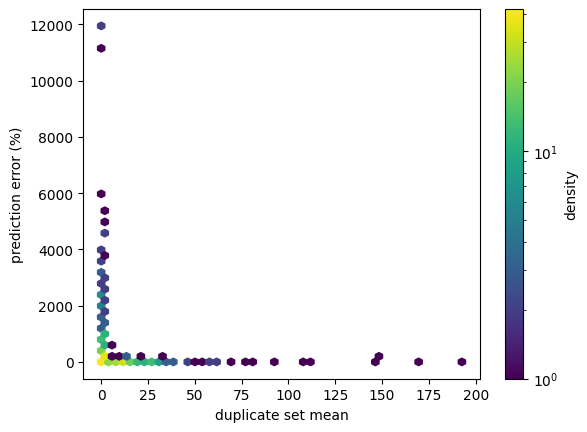

In [35]:
pwx_sets = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")]
plot_data = pd.DataFrame({"error_percent":pwx_sets[("error_percent","median")].values,"dup_mean":pwx_sets.index.get_level_values("dup_mean")})
hb = plt.hexbin(x=plot_data["dup_mean"],y=plot_data["error_percent"] * 100,bins="log",gridsize=(50,30))
plt.colorbar(hb,label="density")
plt.xlabel("duplicate set mean")
plt.ylabel("prediction error (%)")

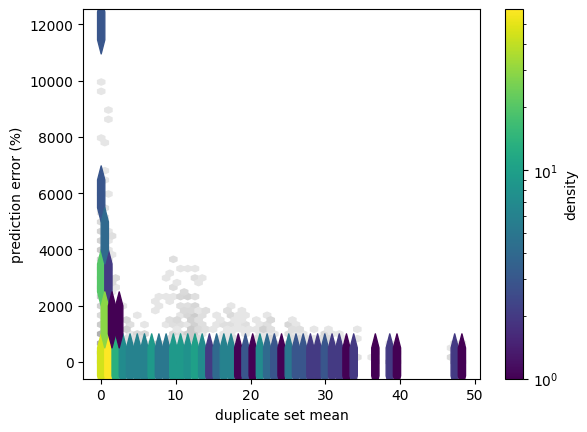

In [36]:
pwx_sets = df_mae_by_app[df_mae_by_app["exe"].str.contains("pw.x") & (df_mae_by_app["error_percent"] < 100) & (df_mae_by_app["dup_mean"] <= 50)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")  & (df_mae_by_app_agg.index.get_level_values("dup_mean") <= 50)]
plot_app_errors(pwx_sets,pwx_sets_median)

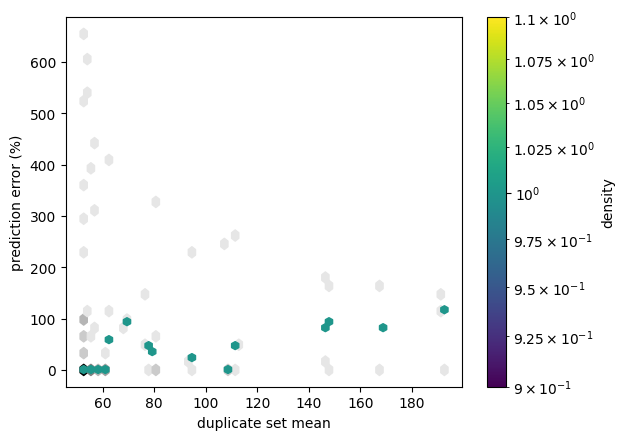

In [37]:
pwx_sets = df_mae_by_app[df_mae_by_app["exe"].str.contains("pw.x") & (df_mae_by_app["error_percent"] < 100) & (df_mae_by_app["dup_mean"] > 50)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")  & (df_mae_by_app_agg.index.get_level_values("dup_mean") > 50)]
plot_app_errors(pwx_sets,pwx_sets_median,(50,20),(50,5))

#### Boxplots

Boxplots per duplicate set only make sense if the duplicate sets are large enough

In [38]:
df_large_sets_pwx = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x") & (df_mae_by_app_agg[("exe","count")] > 100)]).reset_index()
df_large_sets_pwx

exe   dup_mean    exe error_percent        POSIX_TOTAL_TIME               \
                     count        median  count             mean          var   
0   pw.x  26.482347    120      0.096754    120        26.482347  4761.161008   
1   pw.x  25.387623    148      0.100191    148        25.387623  5953.991745   
2   pw.x  22.826111    151      0.106257    151        22.826111  4995.048145   
3   pw.x  22.249491    108      0.109447    108        22.249491  4610.994797   
4   pw.x  22.203737    102      0.106953    102        22.203737  6030.023506   
5   pw.x  17.865087    117      0.133150    117        17.865087  3219.348149   
6   pw.x  17.162653    163      0.148758    163        17.162653  3551.059705   
7   pw.x  13.134005    279      0.192800    279        13.134005  2587.803666   
8   pw.x  12.712165    134      0.195245    134        12.712165  1816.498572   
9   pw.x  12.570089    363      0.190057    363        12.570089  2312.365264   
10  pw.x  12.544182    244      0.196077    244        12.544182  1744.306530   
11  pw.x  12.299134    233      0.195231    233        12.299134  2190.071721   
12  pw.x  12.143692    124      0.177195    124        12.143692  2421.732040   
13  pw.x  12.071466    366      0.208769    366        12.071466  1989.545819   
14  pw.x  11.615713    153      0.217085    153        11.615713  2672.427334   
15  pw.x  11.403251    285      0.214011    285        11.403251  1915.841483   
16  pw.x  11.242140    146      0.220835    146        11.242140  1705.544602   
17  pw.x  10.794726    215      0.212930    215        10.794726  1991.936950   
18  pw.x  10.452372    164      0.215792    164        10.452372  2574.411249   
19  pw.x  10.413978    112      0.148713    112        10.413978  1348.661569   
20  pw.x   9.830752    123      0.219886    123         9.830752  1854.837313   
21  pw.x   9.423698    244      0.254685    244         9.423698  1412.518020   
22  pw.x   9.158112    208      0.230149    208         9.158112  1294.675376   
23  pw.x   7.757916    108      0.308782    108         7.757916   848.336480   
24  pw.x   1.358942    111      0.482130    111         1.358942     0.274678   
25  pw.x   1.350846   4828      0.492485   4828         1.350846   237.440115   
26  pw.x   1.343590   1040      0.488793   1040         1.343590     0.236601   
27  pw.x   1.221651   1963      0.559489   1963         1.221651     0.041323   
28  pw.x   1.210457   2469      0.548716   2469         1.210457   150.500792   
29  pw.x   1.194406   2776      0.656493   2776         1.194406     0.102294   
30  pw.x   1.191031  20276      0.658792  20276         1.191031     0.098550   
31  pw.x   1.148488    388      0.716395    388         1.148488     0.068266   
32  pw.x   1.125637    250      0.730618    250         1.125637     0.159213   
33  pw.x   1.105295    368      0.752858    368         1.105295     0.029371   
34  pw.x   0.981301   1518      0.677546   1518         0.981301     0.262881   
35  pw.x   0.976313    653      0.670350    653         0.976313     0.048154   
36  pw.x   0.970097    487      0.689422    487         0.970097     0.071098   
37  pw.x   0.966100    176      0.673980    176         0.966100     0.054746   
38  pw.x   0.935574    527      0.719305    527         0.935574     0.015482   
39  pw.x   0.931801    132      0.736248    132         0.931801     0.017815   
40  pw.x   0.929601    109      0.717336    109         0.929601     0.018257   

   POSIX_TOTAL_TIME_predicted              
                         mean         var  
0                   13.718941  424.474227  
1                   13.377566  427.750307  
2                   10.713866  348.259465  
3                   11.418284  361.119455  
4                   11.206733  380.242516  
5                   12.544685  403.375936  
6                   12.042567  416.611525  
7                   10.158418  333.549465  
8                   10.742393  328.981836  
9                    8.797488  289.41

In [39]:
mean_selection_ids_pwx = [0,9,21,30,38]

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_5816\2839887796.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_mean = df_large_sets.iloc[index]["dup_mean"][0]


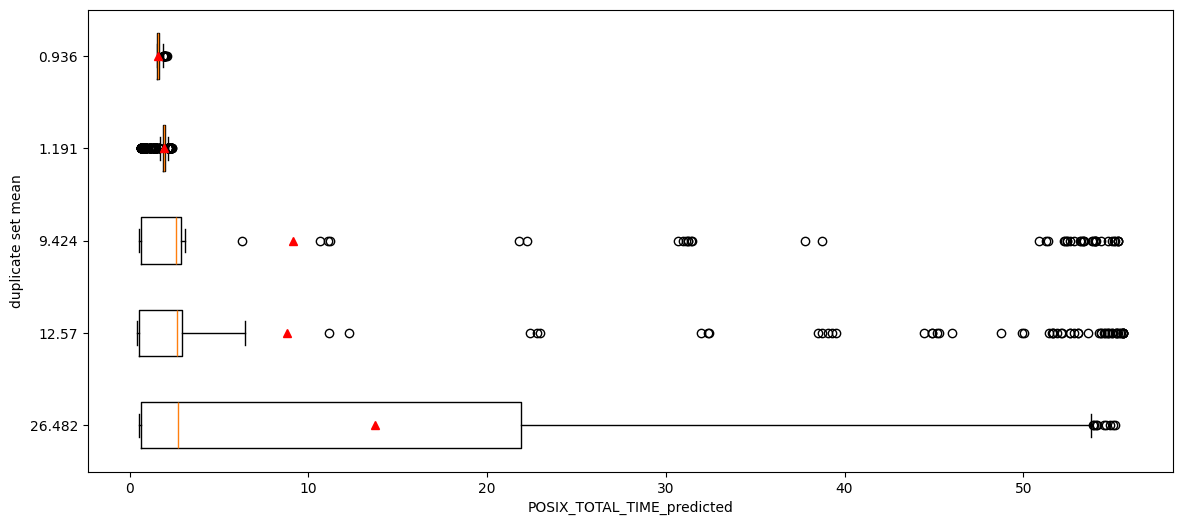

In [40]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME_predicted",True,True)

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_5816\2839887796.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_mean = df_large_sets.iloc[index]["dup_mean"][0]


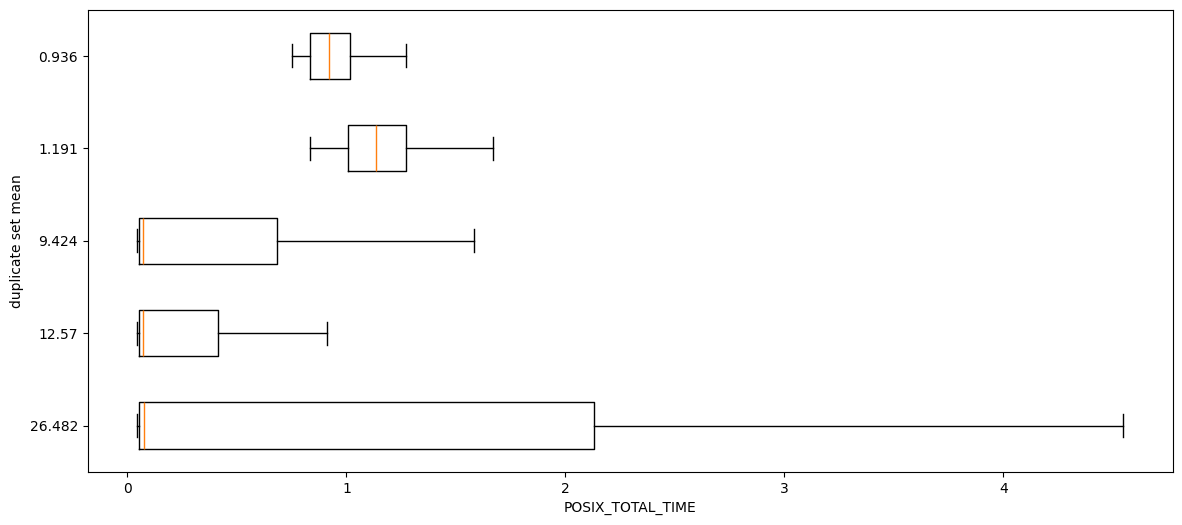

In [41]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME",False)

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_5816\2839887796.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_mean = df_large_sets.iloc[index]["dup_mean"][0]


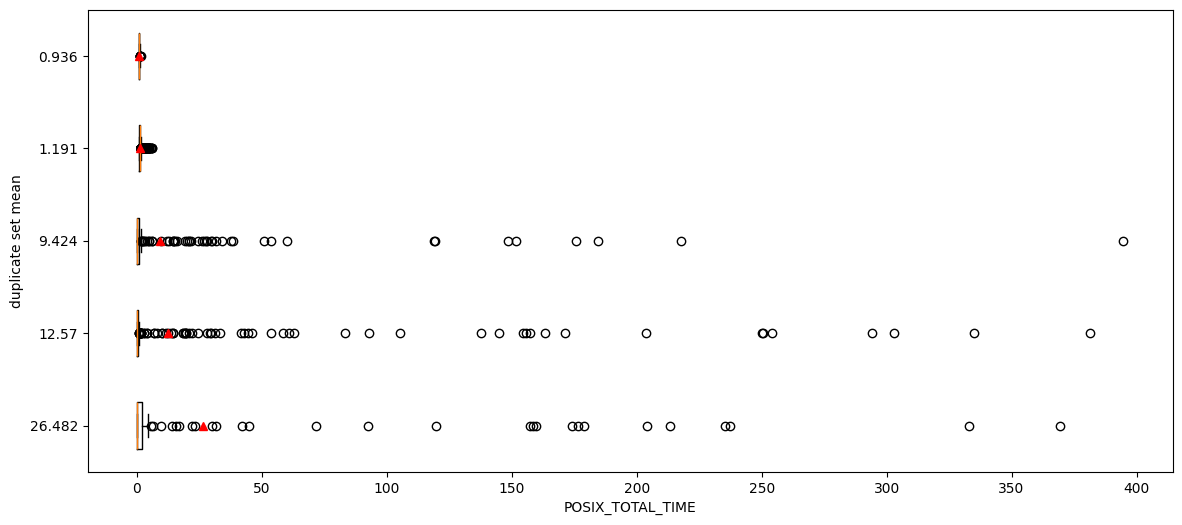

In [42]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME",True,True)

### cp2k

In [43]:
df_large_sets_cp2k = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("cp2k")]).reset_index()
df_large_sets_cp2k

exe    dup_mean   exe  error_percent       POSIX_TOTAL_TIME  \
                           count         median count             mean   
0    cp2k.psmp  605.776131     6     536.351152     6       605.776131   
1    cp2k.psmp  596.476535     3     544.681598     3       596.476535   
2    cp2k.psmp  346.175999     2   33512.574136     2       346.175999   
3    cp2k.psmp  110.549699     2  104932.089690     2       110.549699   
4    cp2k.psmp  106.249756     2  109182.107718     2       106.249756   
..         ...         ...   ...            ...   ...              ...   
219  cp2k.psmp   24.596219     2  471889.353162     2        24.596219   
220  cp2k.psmp   24.556673     2  457734.890618     2        24.556673   
221  cp2k.psmp   24.490823     2  473916.440628     2        24.490823   
222  cp2k.psmp   24.417506     2  475363.076074     2        24.417506   
223  cp2k.psmp   24.399033     2  475709.217563     2        24.399033   

                POSIX_TOTAL_TIME_predicted                
            var                       mean           var  
0    258.778355               3.255173e+05  4.915655e+03  
1     61.572390               3.254577e+05  5.823491e+03  
2      0.368457               1.160160e+07  1.874048e+06  
3     56.849153               1.160032e+07  4.950125e+05  
4     27.558671               1.160068e+07  9.990450e+04  
..          ...                        ...           ...  
219    0.008061               1.160672e+07  3.951605e+05  
220    0.323675               1.124047e+07  5.304500e+03  
221    0.051726               1.160663e+07  9.331200e+04  
222    0.000511               1.160720e+07  2.964500e+05  
223    0.032711               1.160687e+07  1.008005e+05  

[224 rows x 9 columns]

In [44]:
df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[27]["dup_mean"][0]]

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_5816\1285322944.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[27]["dup_mean"][0]]


,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
4,4,4,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,34.010366,64,1,cp2k.psmp,33.63173,0.378636,325531.62
38,38,38,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.735842,64,1,cp2k.psmp,33.63173,-0.895888,325569.97
89,89,89,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.893440,64,1,cp2k.psmp,33.63173,-0.738289,325580.78
125,125,125,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,36.938808,64,1,cp2k.psmp,33.63173,3.307079,325467.88
184,184,184,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,33.702320,64,1,cp2k.psmp,33.63173,0.070590,325568.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20322,20322,20322,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.397479,64,1,cp2k.psmp,33.63173,-1.234251,325575.03
20327,20327,20327,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.801286,64,1,cp2k.psmp,33.63173,-0.830444,325508.78
20508,20508,20508,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,35.522537,64,1,cp2k.psmp,33.63173,1.890807,325504.30
20520,20520,20520,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,34.549826,64,1,cp2k.psmp,33.63173,0.918096,325424.34


In [45]:
df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[0]["dup_mean"][0]]

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_5816\3972795550.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[0]["dup_mean"][0]]


,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
5581,5581,5581,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,635.799299,64,1,cp2k.psmp,605.776131,30.023168,325600.78
6336,6336,6336,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,606.518376,64,1,cp2k.psmp,605.776131,0.742245,325596.80
8383,8383,8383,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,590.952763,64,1,cp2k.psmp,605.776131,-14.823368,325507.84
9238,9238,9238,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,596.446682,64,1,cp2k.psmp,605.776131,-9.329449,325427.16
11866,11866,11866,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,596.843281,64,1,cp2k.psmp,605.776131,-8.932850,325462.53
13592,13592,13592,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,608.096385,64,1,cp2k.psmp,605.776131,2.320254,325508.66


In [46]:
df_theta_posix[(df_theta_posix.exe.str.contains("cp2k")) & (df_theta_posix.POSIX_FILENOS > 5e8)]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
210627,210627,210627,516196627,516196609,0,1434,30990,30394,8273,0,...,0,0,-1,651.141837,8192,1,cp2k.psmp,NaN,0.0,10596235.0


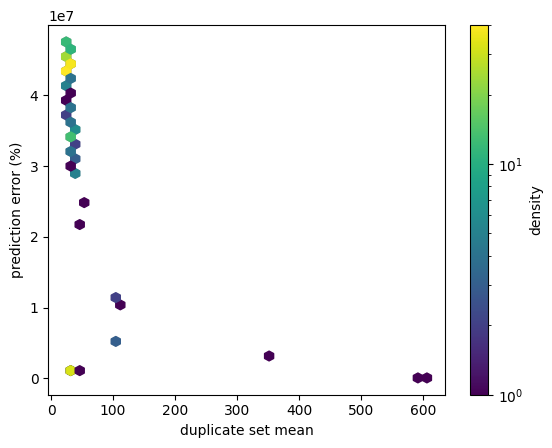

In [47]:
pwx_sets = df_mae_by_app[df_mae_by_app["exe"].str.contains("cp2k")]# & (df_mae_by_app["dup_mean"] <= 1000)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("cp2k")]#  & (df_mae_by_app_agg.index.get_level_values("dup_mean") <= 1000)]
plot_app_errors(pwx_sets,pwx_sets_median,40,40)

## Softplus experiments

<Axes: ylabel='Density'>

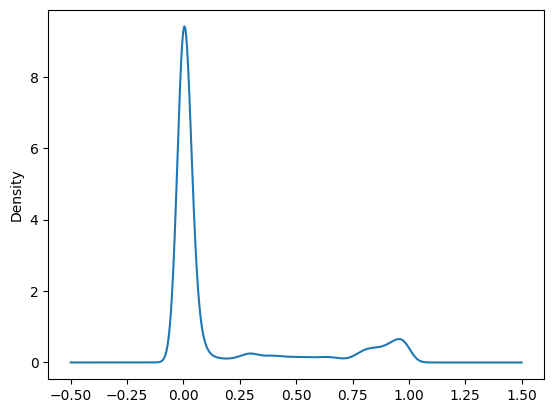

In [48]:
df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME < 1].POSIX_TOTAL_TIME.plot.kde()

In [49]:
df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME < 0.25e-1]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
213,213,213,11,10,0,8,2,2,13,0,...,0,0,-1,0.011388,2,1,sw4lite,0.011151,0.000237,-0.268725
219,219,219,1,1,0,0,1,0,0,0,...,0,0,-1,0.000861,1,0,miniFE_theta_online_perf_low_cap.x,0.000965,-0.000104,-0.174542
226,226,226,1,1,0,0,1,0,0,0,...,0,0,-1,0.001482,1,0,miniFE_theta_online_perf_iter_papi_freq.x,0.000948,0.000534,-0.174619
232,232,232,10,10,0,0,10,0,2,0,...,0,0,0,0.002393,4,0,bs-solctra-multinode,NaN,0.000000,-0.680560
240,240,240,1,1,0,0,1,0,0,0,...,0,0,-1,0.000781,1,0,miniFE_theta_online_perf_low_cap.x,0.000903,-0.000122,-0.174619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218038,218038,218038,1005,1005,0,0,0,0,9,-5,...,0,0,0,0.002957,32,1,nwchem,0.003087,-0.000130,-0.594839
218049,218049,218049,2943,2943,0,0,0,0,8,-4,...,0,0,0,0.003288,128,1,nwchem,0.003325,-0.000037,0.659806
218080,218080,218080,0,-4,-4,0,0,0,5,0,...,0,0,-1,0.001277,1,1,gmx_mpi,0.002336,-0.001059,0.662611
218091,218091,218091,2931,2931,0,0,0,0,8,-4,...,0,0,0,0.003178,128,1,nwchem,0.003321,-0.000143,1.368968


In [50]:
df_theta_posix[(df_theta_posix.exe == "nwchem") == False]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
0,0,0,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,29.684507,64,1,cp2k.psmp,31.913841,-2.229334,325442.780000
1,1,1,194,172,0,34,1499,6,54,0,...,0,0,0,28.155456,16,1,pw.x,11.403251,16.752206,2.771402
2,2,2,46037,40869,0,4713059,1719073,1271774,5429,0,...,0,0,-1,71229.030892,128,1,train.x-2.0.3-ifort_intelmpi,NaN,0.000000,344705.120000
3,3,3,194,172,0,34,1492,6,54,0,...,0,0,2,1.707640,16,1,pw.x,6.519022,-4.811382,11.045769
4,4,4,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,34.010366,64,1,cp2k.psmp,33.631730,0.378636,325531.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218106,218106,218106,618,0,0,15040,10450,21,1555,0,...,0,0,-1,6.904750,64,1,vasp_ncl,NaN,0.000000,4575.343300
218107,218107,218107,68,-22,-22,7829,0,0,116,0,...,0,0,-1,1.194060,16,1,pw.x,1.221651,-0.027592,2.018965
218108,218108,218108,34713,34116,0,8745,49849,240,504,-335,...,0,0,-1,220.660687,96,1,qmcpack,NaN,0.000000,0.479635
218109,218109,218109,68,-22,-22,7829,0,0,116,0,...,0,0,-1,1.274516,16,1,pw.x,1.221651,0.052865,1.838183


In [51]:
neg_threshold = df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME_predicted < 0].POSIX_TOTAL_TIME.median()
filterspec = (df_theta_posix.POSIX_TOTAL_TIME < neg_threshold) & (df_theta_posix.POSIX_TOTAL_TIME_predicted < 0)
df_theta_posix_no_zeros = df_theta_posix[filterspec == False]